In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
student_data = pd.read_csv('raw_students_performance_data.csv')

**Data Processing**

In [4]:
#Check for null values
student_data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
# Create a new columns named 'total_score' and 'avg_score'
student_data['total_score'] = student_data['math score'] + student_data['reading score'] + student_data['writing score']

student_data['avg_score'] = (student_data['total_score']/3).round(2)
print(student_data.head())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score  avg_score  
0          218      72.67  
1          247      82.33  
2          278      92.67  
3          148      49.33  
4          2

In [6]:
student_data.to_csv('clean_students_performance_data.csv',index=False)

**Visualizations**

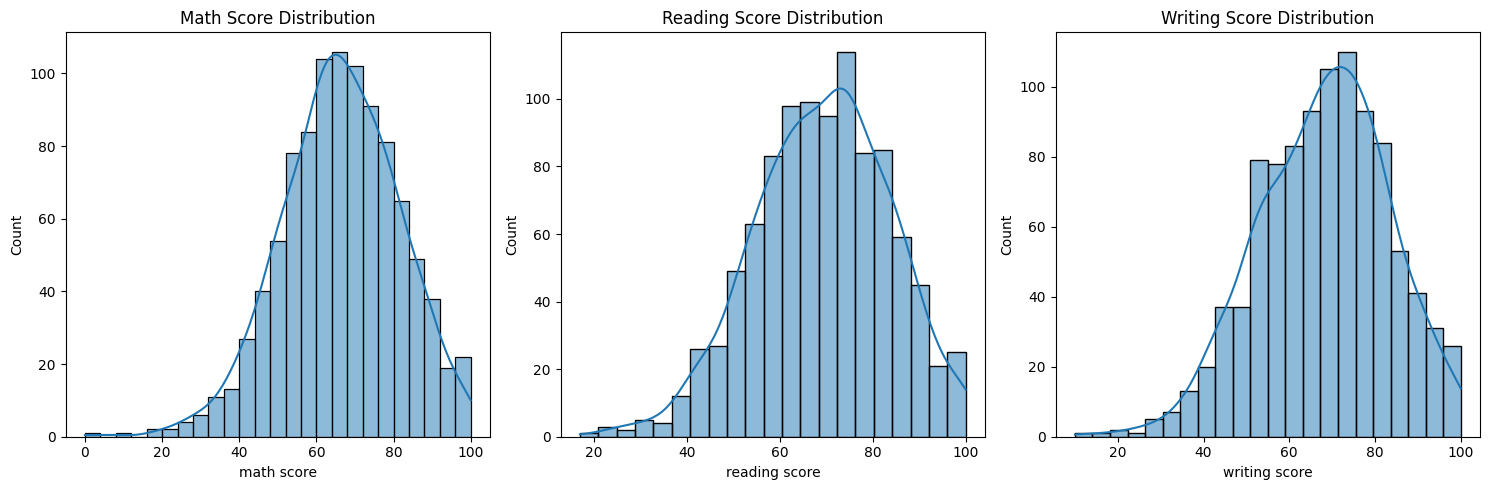

In [7]:
#Histograms for Exam Scores
plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.histplot(student_data['math score'], kde=True)
plt.title('Math Score Distribution')

plt.subplot(132)
sns.histplot(student_data['reading score'], kde=True)
plt.title('Reading Score Distribution')

plt.subplot(133)
sns.histplot(student_data['writing score'], kde=True)
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.savefig('histogram_exam_scores.png')
plt.show()

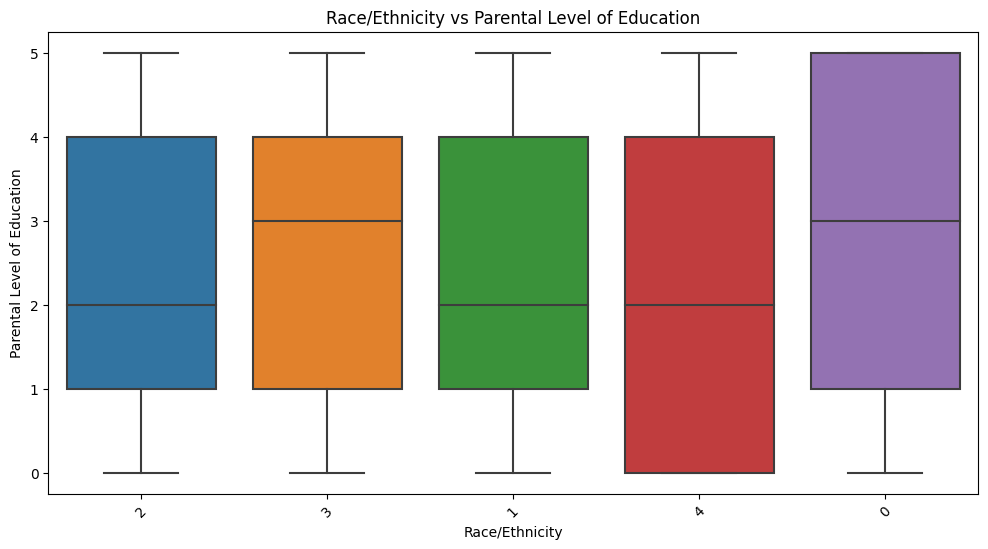

In [11]:
# Box Plot for Race/Ethnicity vs Parental Level of Education
label = LabelEncoder()
data = student_data
data['race/ethnicity'] = label.fit_transform(data['race/ethnicity'])
data['parental level of education'] = label.fit_transform(data['parental level of education'])

plt.figure(figsize=(12, 6))
sns.boxplot(x='race/ethnicity', y='parental level of education', data=student_data,
            order=student_data['race/ethnicity'].value_counts().index)
plt.title('Race/Ethnicity vs Parental Level of Education')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Parental Level of Education')
plt.xticks(rotation=45)
plt.show()


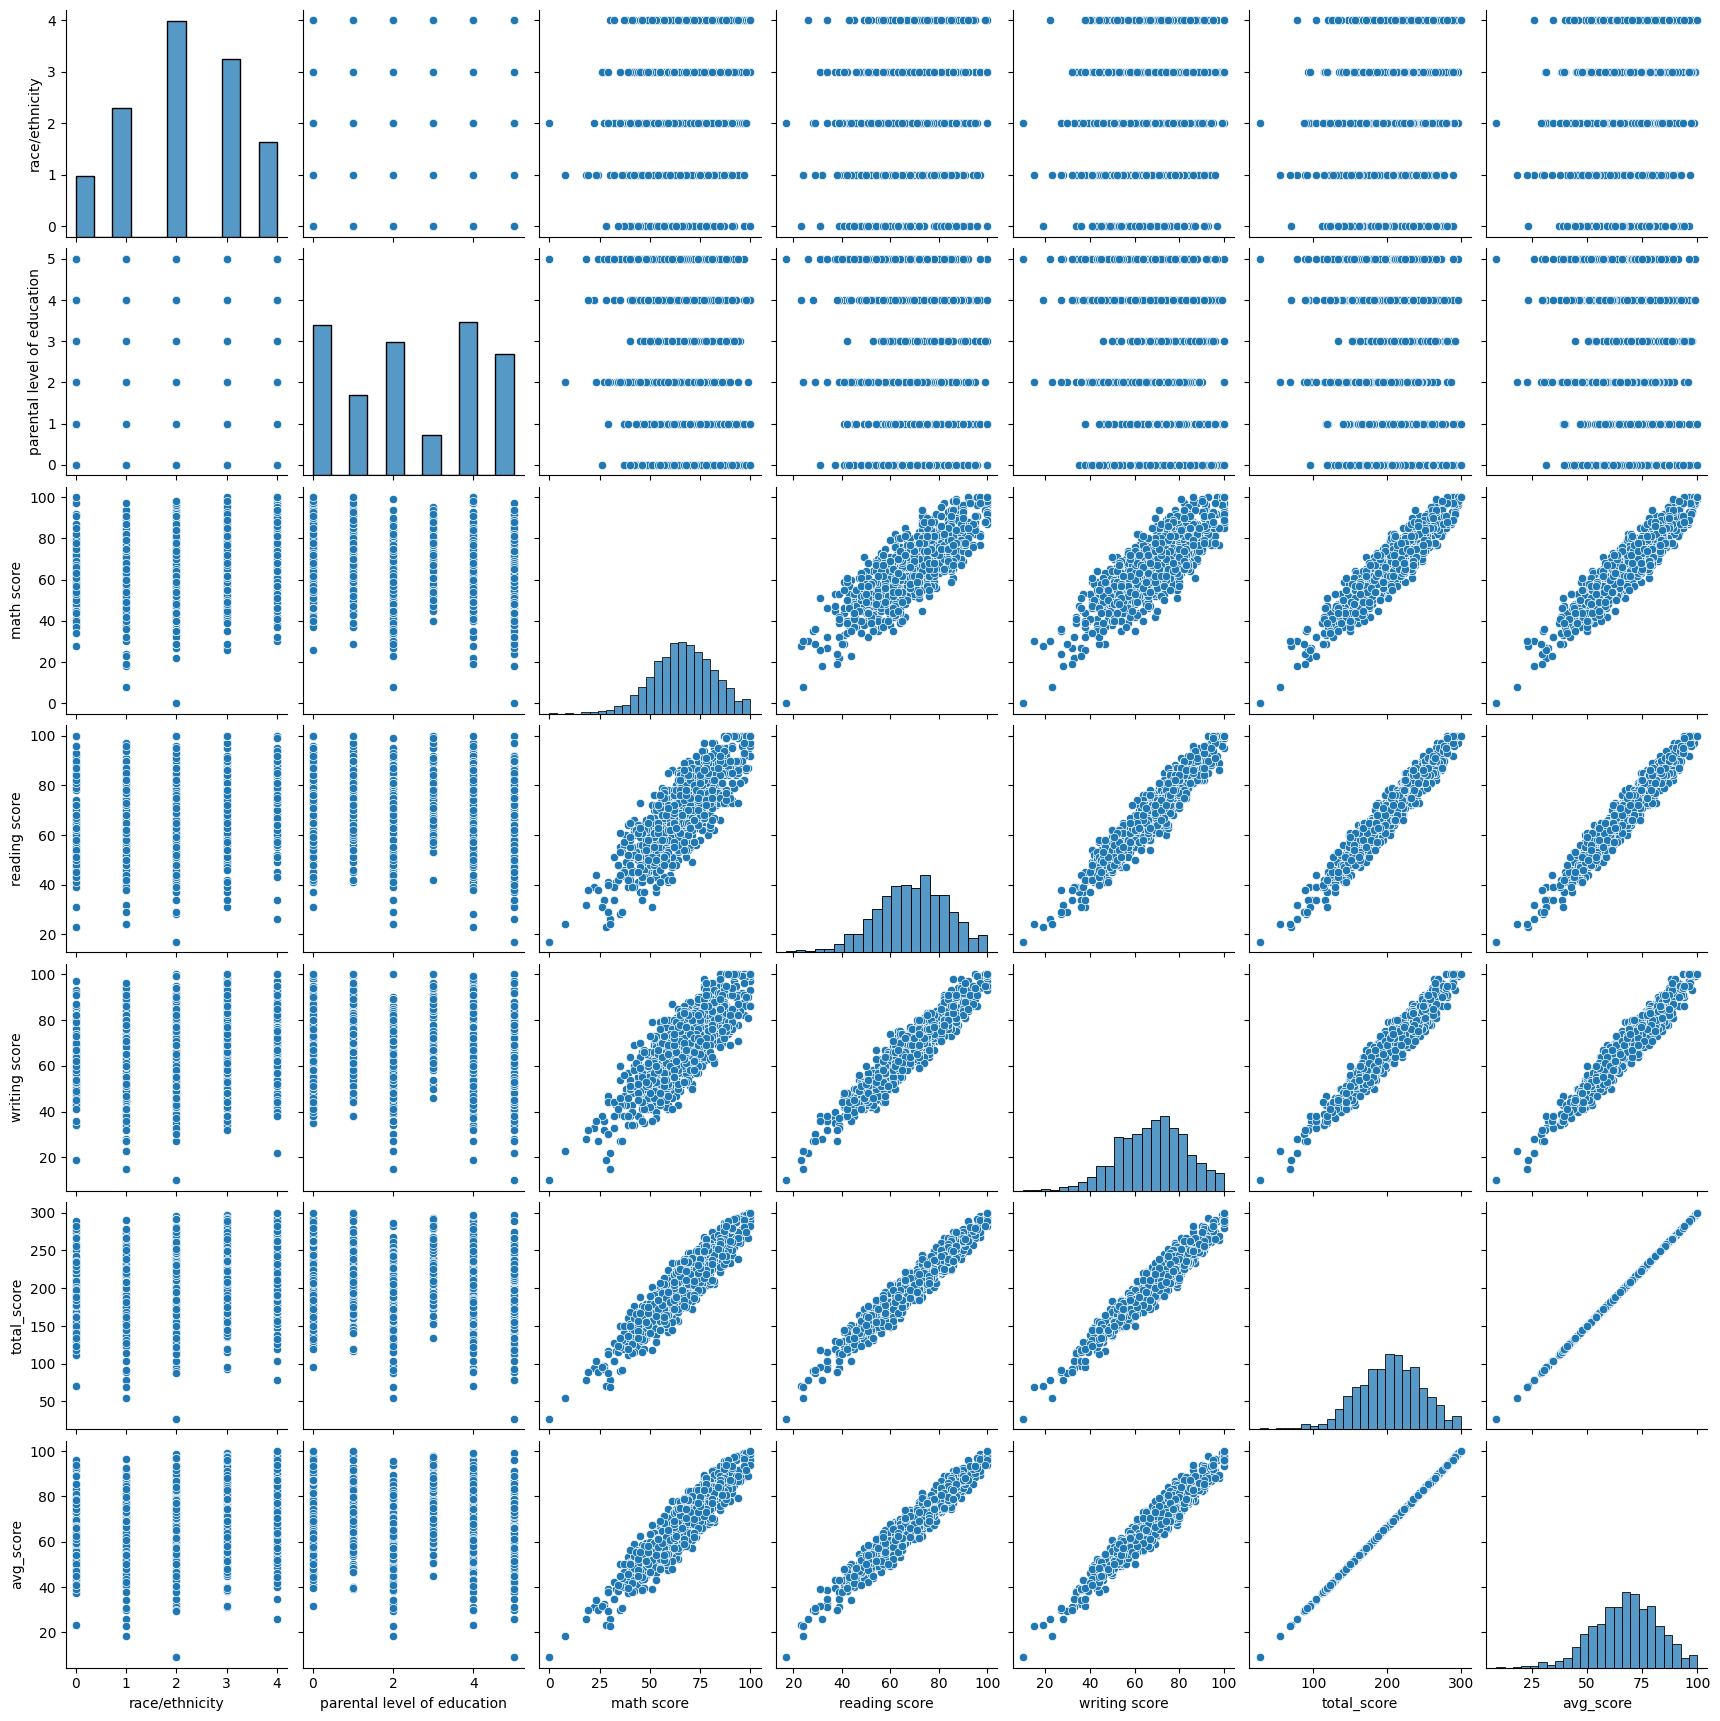

In [12]:
sns.pairplot(student_data)
plt.show()

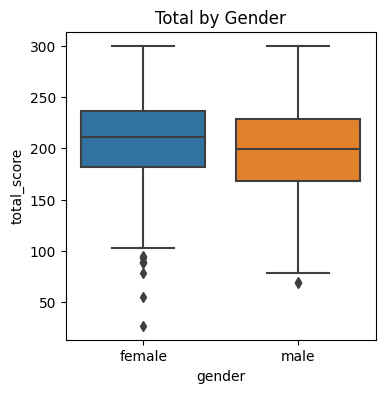

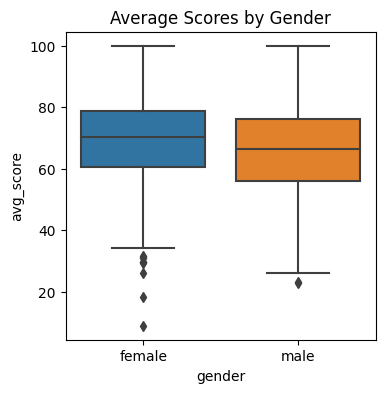

In [13]:
# Total and Average score by Gender
plt.figure(figsize=(4, 4))

sns.boxplot(x='gender', y='total_score', data=student_data)
plt.title('Total by Gender')

plt.figure(figsize=(4, 4))
sns.boxplot(x='gender', y='avg_score', data=student_data)
plt.title('Average Scores by Gender')

plt.show()


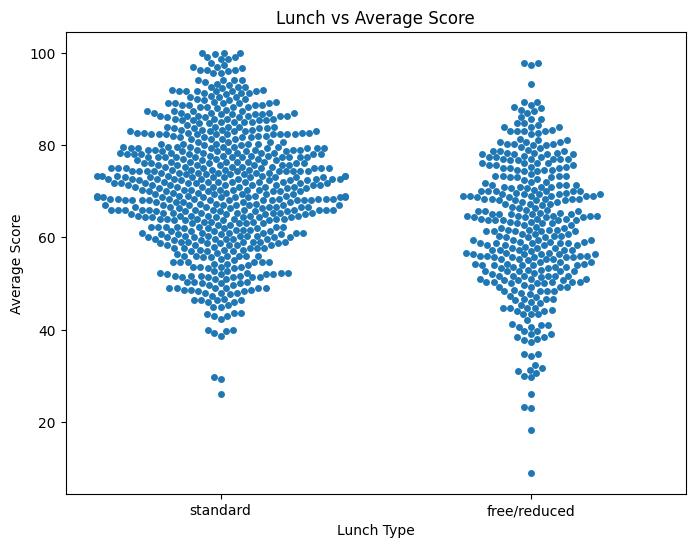

In [14]:
# Lunch vs Average Score
plt.figure(figsize=(8, 6))
sns.swarmplot(x='lunch', y='avg_score', data=student_data)
plt.title('Lunch vs Average Score')
plt.xlabel('Lunch Type')
plt.ylabel('Average Score')
plt.show()
